# Contents of this notebook: (2025-04-02)
- Project 1: use Timm+fastai to train Multi-class images (PASCAL2007)
- Project 2: Image Regression (BIWI HEAD POSE)
- Resources:
    1. fastai lecture part A notebook # 03-which-image-models-are-best.ipynb introduce the timm library.
    2. fastbook #6_mulcat details

# use Timm+fastai to train Multi-class images

In [33]:
import timm
import pandas as pd

In [175]:
#find the family model
res = timm.list_models('res*')
print(res)

['res2net50_14w_8s', 'res2net50_26w_4s', 'res2net50_26w_6s', 'res2net50_26w_8s', 'res2net50_48w_2s', 'res2net50d', 'res2net101_26w_4s', 'res2net101d', 'res2next50', 'resmlp_12_224', 'resmlp_24_224', 'resmlp_36_224', 'resmlp_big_24_224', 'resnest14d', 'resnest26d', 'resnest50d', 'resnest50d_1s4x24d', 'resnest50d_4s2x40d', 'resnest101e', 'resnest200e', 'resnest269e', 'resnet10t', 'resnet14t', 'resnet18', 'resnet18d', 'resnet26', 'resnet26d', 'resnet26t', 'resnet32ts', 'resnet33ts', 'resnet34', 'resnet34d', 'resnet50', 'resnet50_clip', 'resnet50_clip_gap', 'resnet50_gn', 'resnet50_mlp', 'resnet50c', 'resnet50d', 'resnet50s', 'resnet50t', 'resnet50x4_clip', 'resnet50x4_clip_gap', 'resnet50x16_clip', 'resnet50x16_clip_gap', 'resnet50x64_clip', 'resnet50x64_clip_gap', 'resnet51q', 'resnet61q', 'resnet101', 'resnet101_clip', 'resnet101_clip_gap', 'resnet101c', 'resnet101d', 'resnet101s', 'resnet152', 'resnet152c', 'resnet152d', 'resnet152s', 'resnet200', 'resnet200d', 'resnetaa34d', 'resnetaa

In [ ]:
#create models
model = timm.create_model('resnet50', pretrained=True)
model = timm.create_model('efficientnet_b0', pretrained=True, num_classes=10)

In [ ]:
#view architech
print(model)

#calculate the num of params
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {num_params}")

In [ ]:
#timm+fastai
from fastai.vision.all import *
from functools import partial

# 例如使用 resnet50 模型
learn = vision_learner(dls, partial(timm.create_model, 'resnet50', pretrained=True, num_classes=dls.c), metrics=accuracy)
learn.fine_tune(3)

在fastai中，直接传入resnet18或resnet50确实能快速构建图像分类器，但**timm库**在以下几种情况下能更有效地发挥作用：

- 更多元的模型选择
- timm库提供了大量最新的、状态最先进的模型，如<b>EfficientNet、ConvNeXt、Vision Transformer(ViT)</b>等，而这些模型在fastai内置模型中可能没有或选择较少。
- 如果你想尝试不同架构，比较它们在你数据集上的表现，timm是一个很好的资源。
- 更好的性能/效率平衡
- 某些timm模型在参数量、推理速度和精度上可能比传统的ResNet系列更优。
- 在需要高效推理或对模型大小有限制的场景下（例如移动设备部署），可以选择timm中轻量化的模型。
- 灵活的预训练权重
- timm库提供了大量在ImageNet上预训练好的模型，这些预训练权重经过了大量实验调优，通常能为迁移学习提供更好的起点。
- 更高的定制化和实验自由度
- timm提供了统一的接口来创建模型，方便你在不同架构之间切换，不需要修改太多代码。
- 如果你需要对模型进行进一步修改、添加自定义层或调整模型结构，timm的模型往往设计得较为灵活，便于自定义。


**总结：**
当你希望探索更多新颖的架构、追求更高性能或更高效的模型部署时，timm库会非常有用；而对于快速搭建和验证基本视觉任务，fastai内置的resnet系列已经足够。但在实际项目中，灵活地结合timm和fastai，可以让你根据需求选取最佳模型。

more to check on https://timm.fast.ai/ 

## Dataset - PASCAL 2007

Total 9963 images, containing 24640 annotated objects.

The 20 object classes that have been selected are:

- Person: person
- Animal: bird, cat, cow, dog, horse, sheep
- Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train
- Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor

In [32]:
path = untar_data(URLs.PASCAL_2007)

In [35]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [193]:
df.describe()

,fname,labels,is_valid
count,5011,5011,5011
unique,5011,473,2
top,000005.jpg,person,True
freq,1,408,2510


In [194]:
df_test = pd.read_csv(path/'test.csv')
df_test.describe()

,fname,labels
count,4952,4952
unique,4952,409
top,000001.jpg,person
freq,1,455


## dataframe -> DataBlock()

In [39]:
DataBlock??

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Source:        
@docs
@funcs_kwargs
class DataBlock():
    "Generic container to quickly build `Datasets` and `DataLoaders`."
    get_x=get_items=splitter=get_y = None
    blocks,dl_type = (TransformBlock,TransformBlock),TfmdDL
    _methods = 'get_items splitter get_y get_x'.split()
    _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`."
    def __init__(self, 
        blocks:list=None, # One or more `TransformBlock`s
        dl_type:TfmdDL=None, # Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL`
        getters:list=None, # Getter functions applied to results of `get_items`
        n_inp:int=None, # Number of inputs
        item_tfms:list

In [40]:
dblock = DataBlock()

In [41]:
dset = dblock.datasets(df)

In [44]:
print(len(dset.train), len(dset.valid))

4009 1002


In [45]:
x,y = dset.train[0]
x,y

(fname       003681.jpg
 labels       sheep dog
 is_valid         False
 Name: 1857, dtype: object,
 fname       003681.jpg
 labels       sheep dog
 is_valid         False
 Name: 1857, dtype: object)

In [ ]:
v,w = dset.valid[0]
v,w

### DataBlock - functions

In [47]:
dblock = DataBlock(get_x = lambda r:r['fname'], get_y = lambda r:r['labels'])

In [53]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']

In [54]:
dblock = DataBlock(get_x=get_x, get_y=get_y)

In [55]:
dset = dblock.datasets(df)
x,y = dset.train[0]
x,y

('004386.jpg', 'car train')

### independent variables to open images
- ImageBlock
- MultiCategoryBlock

In [56]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x=get_x, get_y=get_y)
dset = dblock.datasets(df)
x,y = dset.train[0]
x,y

(Path('/Users/applewang/.fastai/data/pascal_2007/train/009496.jpg'),
 ['person'])

In [57]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  get_x=get_x, get_y=get_y)
dset = dblock.datasets(df)

In [58]:
x,y = dset.train[0]
x,y

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

20 categories

In [59]:
y.shape

torch.Size([20])

find the idx and its category

In [ ]:
idx = torch.where(dset.train[0][1]==1.)[0]

dset.train.vocab[idx]

item_tfms

In [80]:
len(df.index[~df['is_valid']].tolist())

2501

### splitter, item_tfms

In [108]:
def splitter(df): 
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train, valid


dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                  splitter=splitter, 
                   get_x=get_x, get_y=get_y,
                  item_tfms=Resize(128))

In [109]:
dls = dblock.dataloaders(df, bs=64)

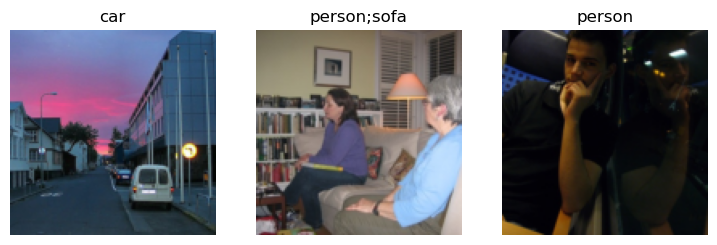

In [110]:
dls.show_batch(max_n=3)

## Model training

In [111]:
learn = vision_learner(dls, resnet18)

In [128]:
x,y = to_cpu(dls.train.one_batch())

In [129]:
actives = learn.model(x)
actives.shape

torch.Size([64, 20])

In [136]:
actives[0].data

TensorImage([ 1.2090,  1.2985, -0.4592,  1.1484,  1.4511, -0.6397,  1.6522,
             -0.1231,  0.7296,  1.6606, -0.7391, -1.8459,  2.1601,  1.8986,
             -0.3020, -1.3157, -1.9643, -1.8666,  0.4742,  0.8925])

In [131]:
y[0]

TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
                     0., 0., 0., 0., 0.])

### Losses & Metrics
**Loss functions 损失函数** （优化目标）
- 自定义Binary cross-entropy --代码简洁。不足：数值稳定性可能不如经过优化的内置函数
- nn.BCEloss() -- 需手动inputs必须经过sigmoid（）转换成（0，1）范围内的概率
- nn.BCEWithLogitsLoss() 推荐👍-- 数值稳定性好：内部使用了 log-sum-exp 等技巧，避免直接计算 log(0) 的问题。代码更简洁。
  - 👍在这里的vision_learner()不需传入loss设定。因为在*MultiCategoryBlock* (DataBlock)中默认loss设定为符合multi-label的BCEWithLogitsLossFlat。


**Metrics 衡量指标** （准确率指标）
- accuracy_multi() -- 针对multi-labels的准确率评估，可以调控是否需要sigmoid，和thresh阈值

In [132]:
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return -torch.where(targets==1, inputs, 1-inputs).log().mean()

In [ ]:
loss_func=nn.BCEWithLogitsLoss()
loss = loss_func(actives[0], y[0]) #not working

In [145]:
accuracy_multi?? #metricss

Signature: accuracy_multi(inp, targ, thresh=0.5, sigmoid=True)
Source:   
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    inp,targ = flatten_check(inp,targ)
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()
File:      ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/metrics.py
Type:      function

### resnet50

In [148]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/applewang/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|█████████████████████████████████████████████████████| 97.8M/97.8M [00:11<00:00, 8.75MB/s]


SuggestedLRs(valley=0.0020892962347716093)

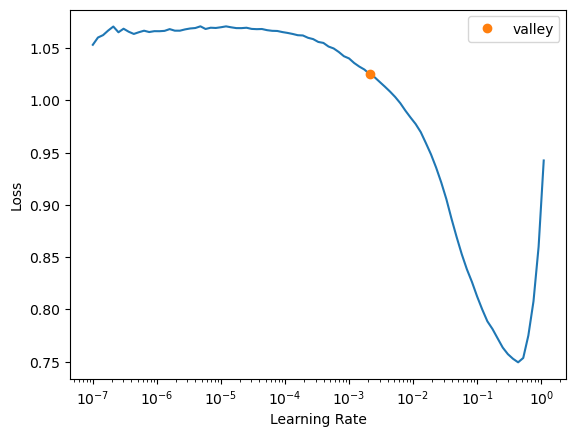

In [149]:
learn.lr_find()

In [150]:
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.958918,0.680295,0.230199,00:17
1,0.833594,0.558183,0.267849,00:15
2,0.605349,0.196388,0.828526,00:15
3,0.354916,0.119775,0.942351,00:15


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.124349,0.104999,0.950159,00:18
1,0.104966,0.100349,0.957191,00:17
2,0.086707,0.099404,0.958207,00:18


In [151]:
learn.metrics = partial(accuracy_multi, thresh=0.1)
learn.validate()

(#2) [0.09940355271100998,0.9422706365585327]

In [152]:
learn.metrics = partial(accuracy_multi, thresh=0.9)
learn.validate()

(#2) [0.09940355271100998,0.9589842557907104]

### predictions
of validation dataset

In [153]:
preds, targets = learn.get_preds()

In [155]:
accuracy_multi(preds, targets, thresh=0.8, sigmoid=False)

TensorBase(0.9634)

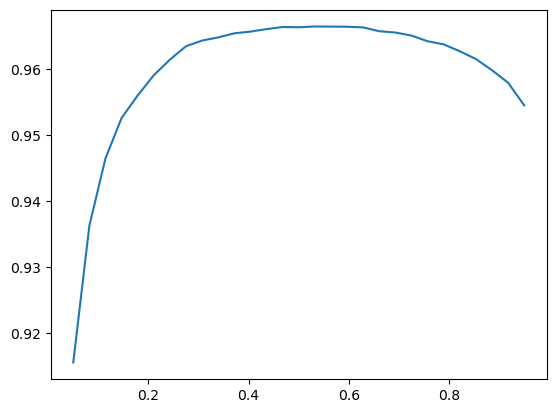

In [158]:
xs =torch.linspace(0.05, 0.95, 29)
accs = [accuracy_multi(preds, targets, thresh=i, sigmoid=False) for i in xs]
plt.plot(xs, accs);

From this plot, thresh=0.5, accuracy (multi) is greater 0.96+

## Timm+Fastai to train

In [167]:
dls.c

20

### resnet 50 vs. resnetv2_50

- ResNet50： (⭐️acc 0.9589)
  
优点：

	•	结构简单、广泛使用，社区支持好。
	•	预训练权重成熟，在许多任务上表现稳定。
	•	缺点：
	•	后激活设计在深层网络中梯度传播可能不如预激活结构高效，训练过程中可能存在一定的难度。

- ResNetV2_50： (acc 0.9538)


优点：

	•	预激活设计使得梯度传递更平滑，尤其在非常深的网络中能更好地训练。
	•	在某些任务上可能获得更高的准确率和更好的泛化性能。
	•	缺点：
	•	结构上较 ResNet50 略微复杂，部分预训练模型可能更新不如 ResNet50 丰富（取决于具体实现和框架支持）。

In [176]:
learn = vision_learner(dls, 
                       partial(timm.create_model, 'resnetv2_50', pretrained=True, num_classes=dls.c),
                       metrics= partial(accuracy_multi, thresh=0.5))

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [177]:
learn.fine_tune(3, 2e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.985894,0.745698,0.557132,00:15
1,0.860033,0.585579,0.708506,00:15
2,0.637488,0.245496,0.937092,00:15


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.264480,0.180055,0.950339,00:17
1,0.211661,0.147829,0.953765,00:18
2,0.179868,0.144053,0.953865,00:18


In [178]:
p, t = learn.get_preds()

In [179]:
accuracy_multi(p, t, thresh=0.5, sigmoid=False)

TensorBase(0.9539)

### use efficientnet_b3

😅 acc 0.9438

In [190]:
timm.list_models("efficientnet*")

['efficientnet_b0',
 'efficientnet_b0_g8_gn',
 'efficientnet_b0_g16_evos',
 'efficientnet_b0_gn',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_g8_gn',
 'efficientnet_b3_gn',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_blur_b0',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_h_b5',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnet_x_b3',
 'efficientnet_x_b5',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'efficientnetv2_s',
 'efficientnetv2_xl']

In [191]:
learn = vision_learner(dls, 
                       partial(timm.create_model, 'efficientnet_b3', pretrained=True, num_classes=dls.c),
                       metrics= partial(accuracy_multi, thresh=0.5))
learn.fine_tune(3, 2e-3, freeze_epochs=3)

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy_multi,time
0,1.013628,0.742008,0.575837,00:22
1,0.898141,0.600118,0.686952,00:18
2,0.681036,0.268641,0.922689,00:18


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.297032,0.204893,0.941076,00:25
1,0.242637,0.171722,0.943785,00:21
2,0.208964,0.166143,0.943865,00:21


# Image Regression

It's easy to think of deep learning models as being classified into domains, like *computer vision*, *NLP*, and so forth. And indeed, that's how fastai classifies its applications—largely because that's how most people are used to thinking of things.

But really, that's hiding a more interesting and deeper perspective. A model is defined by its independent and dependent variables, along with its loss function. That means that there's really a far wider array of models than just the simple domain-based split. Perhaps we have an independent variable that's an image, and a dependent that's text (e.g., generating a caption from an image); or perhaps we have an independent variable that's text and dependent that's an image (e.g., generating an image from a caption—which is actually possible for deep learning to do!); or perhaps we've got images, texts, and tabular data as independent variables, and we're trying to predict product purchases... the possibilities really are endless.

To be able to move beyond fixed applications, to crafting your own novel solutions to novel problems, it helps to really understand the data block API (and maybe also the mid-tier API, which we'll see later in the book). As an example, let's consider the problem of **image regression**. This refers to learning from a dataset where the independent variable is an image, and the dependent variable is one or more floats. Often we see people treat image regression as a whole separate application—but as you'll see here, we can treat it as just another CNN on top of the data block API.

We're going to jump straight to a somewhat tricky variant of image regression, because we know you're ready for it! We're going to do a key point model. A **key point** refers to a specific location represented in an image—in this case, we'll use images of people and we'll be looking for the center of the person's face in each image. That means we'll actually be predicting *two* values for each image: the row and column of the face center. 

## Dataset: BIWI_HEAD_POSE
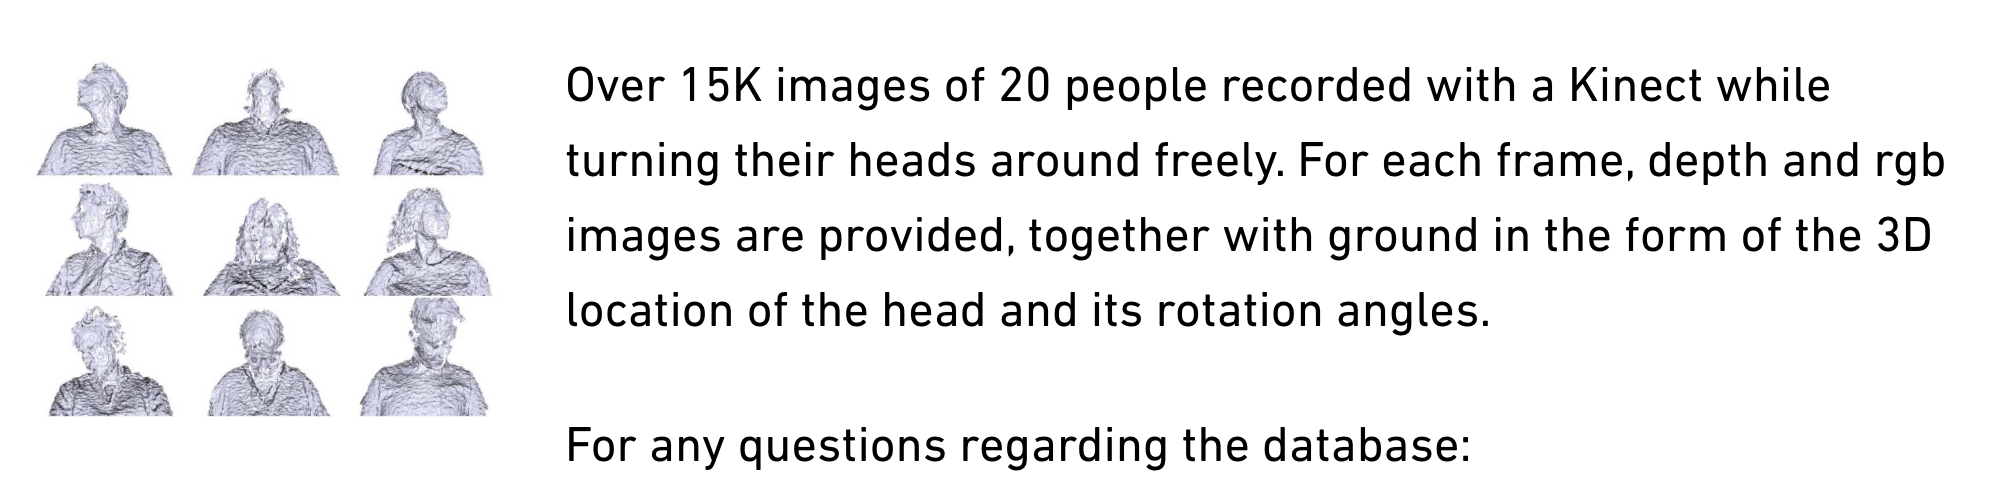

In [214]:
path = untar_data(URLs.BIWI_HEAD_POSE)

Path.BASE_PATH = path 

并不是 pathlib 自带特性，而是在某个项目或第三方库中自定义的方式，用来管理一个全局“基准路径”

In [215]:
Path.BASE_PATH = path

In [216]:
path.ls().sorted()

(#50) [Path('01'),Path('01.obj'),Path('02'),Path('02.obj'),Path('03'),Path('03.obj'),Path('04'),Path('04.obj'),Path('05'),Path('05.obj')...]

In [217]:
(path/'01').ls().sorted()

(#1000) [Path('01/depth.cal'),Path('01/frame_00003_pose.txt'),Path('01/frame_00003_rgb.jpg'),Path('01/frame_00004_pose.txt'),Path('01/frame_00004_rgb.jpg'),Path('01/frame_00005_pose.txt'),Path('01/frame_00005_rgb.jpg'),Path('01/frame_00006_pose.txt'),Path('01/frame_00006_rgb.jpg'),Path('01/frame_00007_pose.txt')...]

注意⚠️：子文件夹（‘01’）的每个frame都有：
- pose.txt (pose file，头部的像素坐标（x, y）以及深度值（z））前3行是注释
- rgb.jpg (image file)
- depth.cal (记录深度相机的外参矩阵，用于将深度图映射到世界坐标或与 RGB 对齐。)
- rgb.cal(记录彩色相机的内参矩阵--内参矩阵是相机的内部参数，包含了焦距、主点等信息，通常是一个 3x3 的矩阵。) 后6行是注释

## how to get the pose file?
- xxxx_pose.txt is the target.

1. get the img file first eg. *Path('03/frame_00393_rgb.jpg')*
2. define a function: get the name (prefix) *03/frame_00393_* , then add the pose file (postfix) *pose.txt* 
3. get the pose file: *Path('03/frame_00393_pose.txt')*

In [218]:
get_image_files??

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/data/transforms.py
Type:      function

In [257]:
imgs = get_image_files(path) #get the images

In [258]:
imgs[0]

Path('03/frame_00393_rgb.jpg')

In [259]:
str(imgs[0])[:-7]

'/Users/applewang/.fastai/data/biwi_head_pose/03/frame_00393_'

In [263]:
def img2pose(x): return Path(f'{str(x)[:-7]}pose.txt')

In [264]:
img2pose(imgs[0])

Path('03/frame_00393_pose.txt')

In [229]:
PILImage??

Init signature: PILImage() -> 'None'
Source:        
class PILImage(PILBase): 
    "A RGB Pillow `Image` that can show itself and converts to `TensorImage`"
    pass
File:           ~/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/vision/core.py
Type:           BypassNewMeta
Subclasses:     PILImageBW

## show an image

In [236]:
im1 = PILImage.create(imgs[0])
im1.shape

(480, 640)

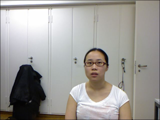

In [237]:
im1.to_thumb(160) #缩略图 to_thumb(size)

## transform to tensor - y label
- _pose.txt: x,y,z （像素坐标，深度）
- rgb.cal （3x3的内参矩阵）


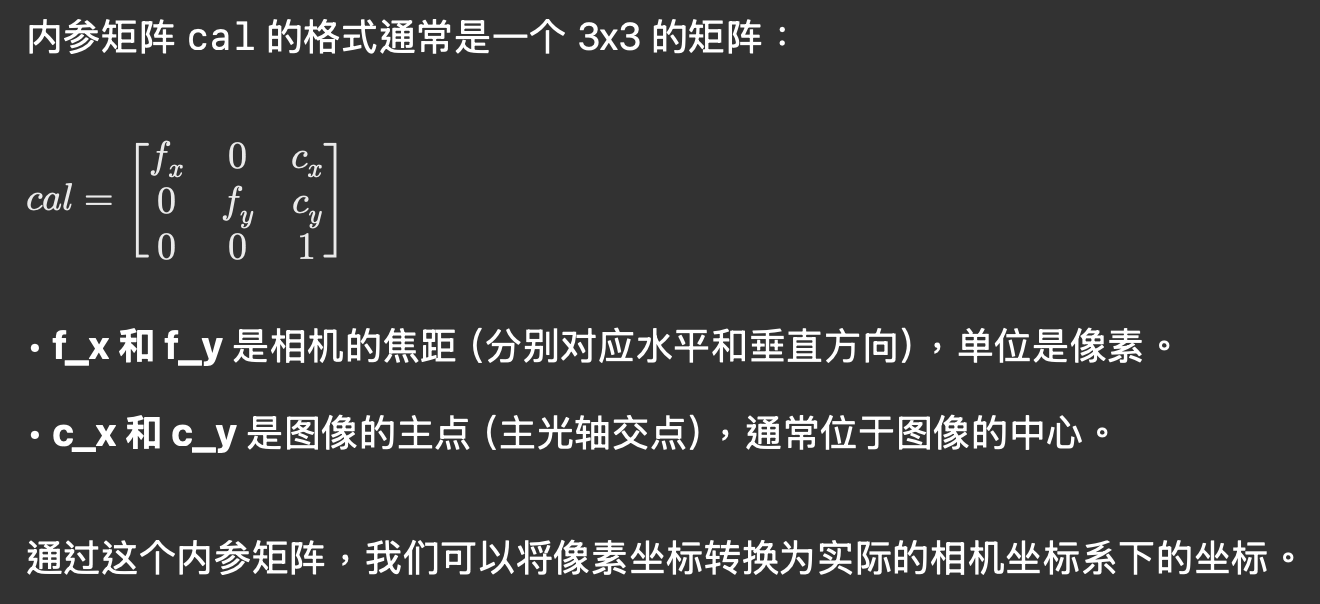
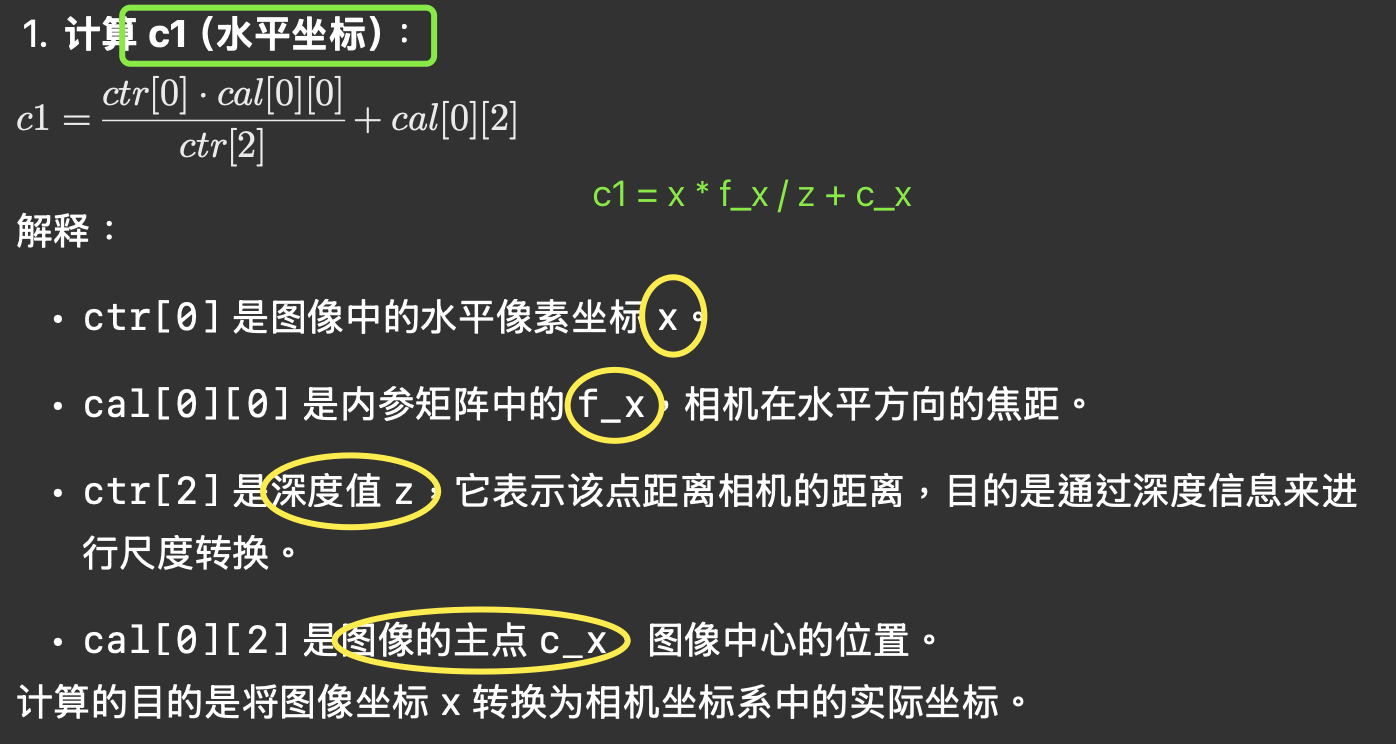 

In [265]:
np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6) #需跳过最后6行（不是数据行，而是zhu shi）

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [266]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
#pose坐标 & 内参矩阵 -> 转换成相机的实际坐标c1,c2(tensor) -> y label
def get_tensor(f): 
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0]*cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1]*cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1, c2])

In [267]:
get_tensor(imgs[0])

tensor([387.1024, 261.9126])

## build a DataBlock()
- resize to half (speed up in training) -> aug_transform(size=(240,320))
- no random splitter (data had 20 people with much frames in 1 folder)
    - pick one person folder totally not in training, but validation.
    - use *FuncSplitter*
- **PointBlock**: its label represents coordinates!

In [ ]:
PointBlock??

In [ ]:
FuncSplitter??

### ⚠️batch_tfms = aug_transform() 不能在macos上运行!
换成item_tfms

In [ ]:
biwi  = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                  get_y=get_tensor,
                 splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                batch_tfms=aug_transforms(size=(240,320)))  #batch_tfms

dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(12,9))

In [274]:
biwi  = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items=get_image_files,
                  get_y=get_tensor,
                 splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                    item_tfms=Resize(240,320)) 

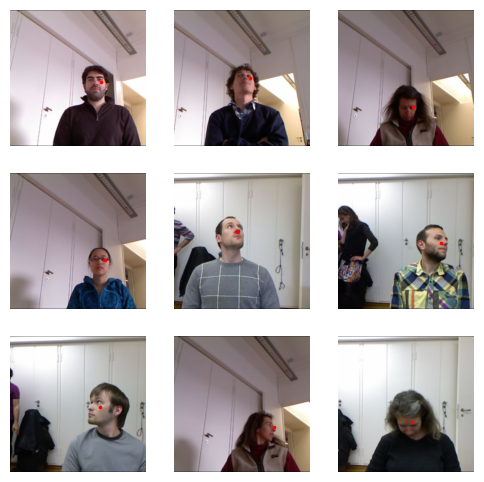

In [277]:
dls = biwi.dataloaders(path)
dls.show_batch(max_n=9, figsize=(6,6))

In [281]:
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 240, 240]), torch.Size([64, 1, 2]))

In [282]:
y[0]

TensorPoint([[-0.4163,  0.1967]], device='mps:0')

## Train a model
- y_range (coordinates in fastai and PyTorch are always rescaled between -1 and +1)
  

In [283]:
biwi_learner = vision_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(valley=0.002511886414140463)

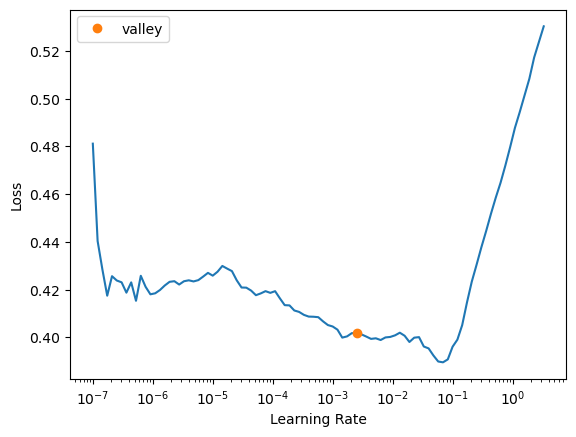

In [284]:
biwi_learner.lr_find()

In [285]:
lr = 0.002
biwi_learner.fine_tune(3, lr)

epoch,train_loss,valid_loss,time
0,0.124705,0.004408,01:12


epoch,train_loss,valid_loss,time
0,0.010501,0.000908,01:27
1,0.003669,0.000529,01:28
2,0.002444,0.000359,01:29


In [287]:
biwi_learner.loss_func

FlattenedLoss of MSELoss()

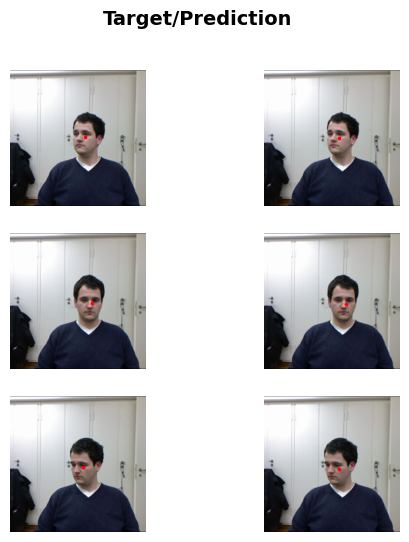

In [289]:
biwi_learner.show_results(ds_idx=1, nrows=3, figsize=(6,6))

## try more?

chatGPT: 如果你已经尝试过在 BIWI Head Pose 数据集 上应用 image regression 技术，并希望将这一方法应用到其他数据集上，以下是一些具有相似目标的推荐数据集，适合用于进行图像回归任务。它们涉及姿态估计、深度估计、面部关键点回归等任务，都可以使用类似的回归方法进行训练。

⸻

1. AFLW (Annotated Facial Landmarks in the Wild)

    - 任务：面部关键点回归（Facial Landmark Detection）。
    - 数据集概述：AFLW 是一个大规模的面部图像数据集，包含 21,000 多张面部图像，标注了 19 个关键点。这个数据集广泛用于面部关键点检测和面部姿态估计。
	- 回归任务：你可以使用图像回归来预测图像中各个面部关键点的 2D 坐标，例如预测左眼、右眼、嘴巴等位置。
	- 推荐理由：与 BIWI 数据集相似，AFLW 数据集的关键点检测任务可以通过回归方法来进行，适合你尝试图像回归的方法。


⸻

2. 300W
   
	- 任务：面部关键点回归（Facial Landmark Detection）。
	- 数据集概述：300W 是一个包含面部图像和关键点标注的较大数据集，包含 300 多张不同姿态、表情和光照条件下的图像。该数据集用于面部关键点检测任务。
	- 回归任务：同样，你可以通过回归方法预测面部图像中的 68 个面部关键点的 2D 坐标。
	- 推荐理由：与 BIWI 数据集相似，300W 提供了面部关键点的标注，适合训练一个基于图像回归的模型来进行面部定位。

⸻

3. NYU Depth V2
   
	- 任务：深度估计（Depth Estimation）和图像回归。
	- 数据集概述：NYU Depth V2 数据集包含超过 400,000 张 RGB-D 图像，涵盖多个室内场景，提供了彩色图像和对应的深度图。
	- 回归任务：你可以使用图像回归技术从 RGB 图像中预测深度信息，即 每个像素的深度值，或者进行 深度图生成，将输入图像映射到三维空间。
	- 推荐理由：深度估计任务通常是图像回归的一种应用场景，NYU Depth V2 数据集适合进行图像回归来预测每个像素的深度。

⸻

4. KITTI
   
	- 任务：自动驾驶、深度估计、物体检测等。
	- 数据集概述：KITTI 是自动驾驶领域非常著名的数据集，包含 RGB 图像、深度图、点云数据等，广泛用于物体检测、深度估计、语义分割等任务。
	- 回归任务：你可以使用 KITTI 数据集进行 深度估计回归，通过 RGB 图像来预测深度图或相机的姿态。
	- 推荐理由：KITTI 数据集提供了丰富的驾驶场景数据，适合进行基于图像回归的深度估计任务，与你在 BIWI 数据集中的方法类似。

⸻

5. CelebA

	- 任务：面部属性回归（Facial Attribute Regression）。
	- 数据集概述：CelebA 是一个大规模的面部数据集，包含超过 200,000 张面部图像，标注了 40 种面部属性（如微笑、眼镜、胡子等）。此外，还标注了 5 个关键点。
	- 回归任务：你可以使用图像回归方法来预测面部图像的 属性标签，如预测是否佩戴眼镜、是否有胡子等。
	- 推荐理由：这与 BIWI 数据集中的面部姿态回归任务类似，适合用回归方法来预测面部图像中的离散或连续特征。

⸻

6. DeepFashion
   
	- 任务：服装图像的属性回归（Fashion Attribute Regression）。
	- 数据集概述：DeepFashion 数据集是一个大规模的服装数据集，包含了 80 万张服装图像和超过 50 个类别的标注。它还包含了各种图像属性和 2D/3D 关键点位置。
	- 回归任务：可以通过回归方法预测服装图像中的 衣服颜色、种类、尺寸等 连续属性。
	- 推荐理由：DeepFashion 是一个典型的图像属性回归问题数据集，适合进行基于图像回归的任务来预测图像的属性。

⸻

7. Multiview Stereo (MVS) Dataset

	- 任务：多视角立体图像重建（Multiview 3D Reconstruction）。
	- 数据集概述：这个数据集包含来自多个视角拍摄的图像，用于从多个视角重建物体的三维形状。每个视角的图像都有相应的深度信息。
	- 回归任务：从多个视角的图像中，使用图像回归预测每个像素的深度信息，或者进行 3D 重建。
	- 推荐理由：对于从多视角图像中预测深度信息或进行三维重建的任务，MVS 数据集可以很好的应用图像回归方法。

⸻

总结

基于 image regression 的任务可以应用于多个领域，特别是在姿态估计、深度估计、面部关键点检测、物体定位等任务中。通过回归方法从图像中预测连续的数值或坐标，可以在多个实际应用中帮助解决问题。你可以尝试上述推荐的数据集，来应用你在 BIWI 数据集上的方法，进行新的实验和研究。

# fastbook #6_multicat questionnaire

以下是针对你提出的多个问题的解答：

⸻

1. How could multi-label classification improve the usability of the bear classifier?

多标签分类可以提升“熊分类器”的实用性，因为它允许模型在每个图像中同时识别多个类别。比如，除了判断图像是否包含“熊”以外，模型还可以同时判断是否包含其他动物或者图像的背景类别（例如“森林”、“草地”等）。这种方式更符合实际场景中的需求，特别是在复杂环境中，图像可能包含多个类别的对象。

⸻

2. How do we encode the dependent variable in a multi-label classification problem?

在多标签分类问题中，依赖变量（即目标标签）通常用二进制编码（one-hot 编码的扩展）表示。例如，对于每个标签，都使用一个单独的二进制值，表示该标签是否存在。例如，如果有 3 个标签，“熊”、“狼”和“狗”，图像可能有熊和狗两个标签，那么标签就会被编码为 [1, 0, 1]，表示熊和狗标签是存在的，而狼标签不存在。

⸻

3. How do you access the rows and columns of a DataFrame as if it was a matrix?

在 Pandas 中，您可以使用 .values 属性将 DataFrame 转换为一个 NumPy 数组，这样就可以像矩阵一样访问数据。通过这种方式，行和列的索引也会被转换为相应的数字索引。
```python
df = pd.DataFrame([[1, 2], [3, 4]])
matrix = df.values
print(matrix[0, 1])  # 访问第一行第二列的元素
```

⸻

4. How do you get a column by name from a DataFrame?

要从 DataFrame 中通过列名获取某一列，直接使用列名作为索引即可：
```python
column = df['column_name']
```


⸻

5. What is the difference between a Dataset and DataLoader?
   
	- Dataset：是一个数据集合类，它表示数据集本身（例如图像数据、文本数据）。它通常继承自 torch.utils.data.Dataset 类，并需要实现 __len__ 和 __getitem__ 方法，用于获取数据样本。
      
	- DataLoader：是一个数据加载器，用于将 Dataset 中的数据按批次（batch）加载到模型中，通常会结合多线程进行并行处理，以提高数据处理的效率。DataLoader 可以进行数据的批量化、打乱、并行加载等操作。

⸻

6. What does a Datasets object normally contain?

一个 Datasets 对象通常包含：

	- 训练集（train） 和 验证集（valid） 数据。
	- 每个数据集（train 和 valid）通常包含输入特征和目标标签。
	- 可能包含一些变换（如数据增强、标准化）和自定义的标签生成逻辑。

⸻

7. What does a DataLoaders object normally contain?

一个 DataLoaders 对象通常包含：

	- 训练数据加载器（train_dl） 和 验证数据加载器（valid_dl），即用来加载训练和验证数据的 DataLoader 对象。
	- batch_size、数据增强（transform）、shuffle 等超参数。

⸻

8. What does lambda do in Python?

lambda 是一种匿名函数，用于定义一个简单的函数，通常用于只使用一次的简单操作。它的语法如下：

lambda arguments: expression

例如：
```python

add = lambda x, y: x + y
print(add(2, 3))  # 输出 5

```

⸻

9. What are the methods to customize how the independent and dependent variables are created with the data block API?

在 Fastai 的 DataBlock API 中，常用的方法有：

	•	get_x：用于从数据集中提取输入变量（特征），例如图像路径。
	•	get_y：用于从数据集中提取目标变量（标签），例如图像对应的标签。
	•	splitter：用于划分训练集和验证集（例如通过文件名、随机划分等）。
	•	item_tfms 和 batch_tfms：用于数据增强和批次转换。

⸻

10. Why is **softmax** not an appropriate output activation function when using a one hot encoded target?

在使用 one-hot 编码的目标时，softmax 常用于多类分类任务，因为它会将输出转换为概率分布。然而，在多标签分类问题中，目标可能包含多个标签，使用 softmax 会使每个标签之间产生相互排斥的关系，这不适合多标签任务。在多标签分类中，通常使用 sigmoid 激活函数来处理每个标签的独立性。

⸻

11. Why is **nll_loss** not an appropriate loss function when using a one-hot-encoded target?

nll_loss（负对数似然损失）通常用于多分类问题，并且配合 softmax 使用。然而，nll_loss 在多标签问题中不适用，因为每个标签是独立的，且有多个标签可能同时存在，而 nll_loss 需要类别之间互斥。因此，适用于多标签分类的损失函数是 BCEWithLogitsLoss。

⸻

12. What is the difference between nn.BCELoss and nn.BCEWithLogitsLoss?
    
	- nn.BCELoss：用于二分类问题，假设输入已经是通过 sigmoid 激活的概率值，输出是 0 到 1 之间的值。
	- nn.BCEWithLogitsLoss：用于二分类问题，不需要提前使用 sigmoid 激活，它将原始的网络输出（即 logits）作为输入，并在计算损失时自动进行 sigmoid 激活。

⸻

13. Why can’t we use regular accuracy in a multi-label problem?

在多标签分类问题中，每个样本可能有多个标签（而非一个标签），因此“常规准确率”不能准确衡量模型的性能。常规准确率计算的是预测标签与真实标签完全一致的样本比例，但多标签分类中每个标签的独立性使得这种计算方式不合适。通常使用 准确率（accuracy） 或 F1 score 来衡量每个标签的表现。

⸻

14. When is it okay to tune a hyperparameter on the validation set?

调整超参数时，应该在训练集上训练，使用验证集来选择最好的超参数。超参数调整不应该在测试集上进行，因为测试集用于最终评估模型性能，测试集应该保留作为模型评估的标准。

⸻

15. How is y_range implemented in fastai? (See if you can implement it yourself and test it without peeking!)

在 Fastai 中，y_range 是用来定义目标变量的范围（例如，在回归问题中）：

	•	它通常通过 y_range 参数传递给 Learner 或 DataBlock，用于对目标进行归一化处理。

例如：
```python
learn = cnn_learner(dls, resnet34, y_range=(0, 1))

```

⸻

16. What is a regression problem? What loss function should you use for such a problem?

回归问题是预测一个连续变量的任务，而不是分类问题中的离散类别。常用的损失函数是 均方误差损失（MSELoss），它计算预测值与真实值之间的差异平方。

⸻

17. What do you need to do to make sure the fastai library applies the same data augmentation to your input images and your target point coordinates?

在 Fastai 中，如果你希望对输入图像和目标坐标（例如，关键点）应用相同的数据增强，可以使用 item_tfms 和 batch_tfms 来对数据进行处理，并确保使用相同的转换（例如，旋转、缩放等）。point_coord 或 keypoint 类型的标签可以与图像一起进行增强：

```python
transforms = [RandomResizedCrop(), Flip()]
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   item_tfms=transforms)
```